In [1]:
# import libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
# recreating dataframe from previous lesson

df_US = df[df['job_country'] == 'United States'].copy()

df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

df_US_pivot = df_US_pivot.reset_index()

df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month

df_US_pivot.sort_values('job_posted_month_no')

df_US_pivot.set_index('job_posted_month')

df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot


job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,job_posted_month_no
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
2,December,648,40,3979,2641,3472,119,601,689,752,212,12
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
9,November,719,36,4531,2793,4175,132,656,684,816,194,11


In [6]:
# bringing in new csv to merge with dataframe

df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [8]:
# merging two dataframes

df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')

df_US_merged

,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,job_posted_month_no,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4,14037,9209,7232,4220
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8,11571,8191,7413,4104
2,December,648,40,3979,2641,3472,119,601,689,752,212,12,14033,9232,6731,4367
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2,11456,9116,7298,4284
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1,13619,9827,5108,4348
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7,11914,8061,6839,4344
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6,12003,8065,5902,4781
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3,11102,8178,5814,4159
8,May,279,20,4993,2976,4377,49,839,746,914,90,5,12126,8864,6718,4980
9,November,719,36,4531,2793,4175,132,656,684,816,194,11,13771,9034,5653,4099


In [18]:
# plot top 5 jobs based on count of jobs in year
# analzye how these jobs trend over time

# Select only numeric columns

import numpy as np

numeric_df = df_US_merged.select_dtypes(include=[np.number])

# Sum the numeric columns, find only top 5 job titles

top_5 = (numeric_df
         .sum()
         .sort_values(ascending=False)
         .head()
         .index
         .to_list()
         )

# Display the top 5 results

print(top_5)


['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer', 'Data Analyst', 'Data Scientist']


<Axes: >

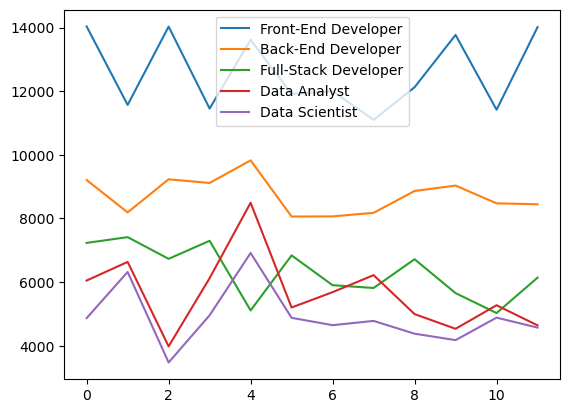

In [19]:
# plotting dataframe

numeric_df[top_5].plot(kind='line')